In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

# List all files you uploaded
all_files = os.listdir()

# This loop will print column names of each CSV file
for file_name in all_files:
    if file_name.endswith('.csv'):
        temp_df = pd.read_csv(file_name, nrows=0) # nrows=0 means only read the header, not data
        print(f"File: {file_name}")
        print(f"Columns: {temp_df.columns.tolist()}")
        print("-" * 30)

File: Enrolment_1.csv
Columns: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']
------------------------------
File: Biometric_4.csv
Columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']
------------------------------
File: Enrolment_3.csv
Columns: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']
------------------------------
File: Biometric_1.csv
Columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']
------------------------------
File: Biometric_3.csv
Columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']
------------------------------
File: Biometric_2.csv
Columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']
------------------------------
File: Enrolment_2.csv
Columns: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']
------------------------------
File: Demographic_2.csv
Columns:

In [3]:
# 1. Combining all Enrolment files
enrol_files = ['Enrolment_1.csv', 'Enrolment_2.csv', 'Enrolment_3.csv']
enrol_df = pd.concat([pd.read_csv(f) for f in enrol_files], ignore_index=True)

# 2. Combining all Demographic files
demo_files = ['Demographic_1.csv', 'Demographic_2.csv', 'Demographic_3.csv', 'Demographic_4.csv', 'Demographic_5.csv']
demo_df = pd.concat([pd.read_csv(f) for f in demo_files], ignore_index=True)

# 3. Combining all Biometric files
bio_files = ['Biometric_1.csv', 'Biometric_2.csv', 'Biometric_3.csv', 'Biometric_4.csv']
bio_df = pd.concat([pd.read_csv(f) for f in bio_files], ignore_index=True)

print("Success! Master DataFrames are ready.")
print(f"Total Enrolment records: {len(enrol_df)}")
print(f"Total Demographic records: {len(demo_df)}")
print(f"Total Biometric records: {len(bio_df)}")

Success! Master DataFrames are ready.
Total Enrolment records: 1006029
Total Demographic records: 2071700
Total Biometric records: 1861108


In [4]:
# 1. Convert 'date' with errors='coerce'
# 'coerce' means if a date is invalid, it will set it as NaT (Not a Time) instead of giving an error.
enrol_df['date'] = pd.to_datetime(enrol_df['date'], errors='coerce')
demo_df['date'] = pd.to_datetime(demo_df['date'], errors='coerce')
bio_df['date'] = pd.to_datetime(bio_df['date'], errors='coerce')

# 2. Check if any dates became NaT (null) after conversion
print("Invalid dates in Enrolment:", enrol_df['date'].isnull().sum())
print("Invalid dates in Demographic:", demo_df['date'].isnull().sum())
print("Invalid dates in Biometric:", bio_df['date'].isnull().sum())

# 3. If there are NaT values, we will drop them to keep the data clean
enrol_df = enrol_df.dropna(subset=['date'])
demo_df = demo_df.dropna(subset=['date'])
bio_df = bio_df.dropna(subset=['date'])

print("\nSuccess! Dates are converted and cleaned.")

Invalid dates in Enrolment: 682238
Invalid dates in Demographic: 1187968
Invalid dates in Biometric: 944100

Success! Dates are converted and cleaned.


In [5]:
# Check unique States and Districts in all 3 datasets
print("--- STATES CHECK ---")
print("Unique States in Enrolment:", len(enrol_df['state'].unique()))
print("Unique States in Demographic:", len(demo_df['state'].unique()))
print("Unique States in Biometric:", len(bio_df['state'].unique()))

print("\n--- DISTRICTS CHECK ---")
print("Unique Districts in Enrolment:", len(enrol_df['district'].unique()))
print("Unique Districts in Demographic:", len(demo_df['district'].unique()))
print("Unique Districts in Biometric:", len(bio_df['district'].unique()))

--- STATES CHECK ---
Unique States in Enrolment: 54
Unique States in Demographic: 56
Unique States in Biometric: 56

--- DISTRICTS CHECK ---
Unique Districts in Enrolment: 954
Unique Districts in Demographic: 958
Unique Districts in Biometric: 963


In [6]:
def deep_clean(df):
    # 1. Remove any leading or trailing spaces
    # 2. Convert everything to Title Case (First letter capital)
    df['state'] = df['state'].str.strip().str.title()
    df['district'] = df['district'].str.strip().str.title()
    return df

# Applying cleaning to all three
enrol_df = deep_clean(enrol_df)
demo_df = deep_clean(demo_df)
bio_df = deep_clean(bio_df)

# Now let's check the counts again to see the improvement
print("--- AFTER CLEANING ---")
print("Unique States (Enrolment):", enrol_df['state'].nunique())
print("Unique Districts (Enrolment):", enrol_df['district'].nunique())

--- AFTER CLEANING ---
Unique States (Enrolment): 49
Unique Districts (Enrolment): 939


In [7]:
# Get the list of unique states to see the mistakes
print(sorted(enrol_df['state'].unique()))

['100000', 'Andaman & Nicobar Islands', 'Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli', 'Dadra And Nagar Haveli', 'Dadra And Nagar Haveli And Daman And Diu', 'Daman & Diu', 'Daman And Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Orissa', 'Pondicherry', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'The Dadra And Nagar Haveli And Daman And Diu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West  Bengal', 'West Bangal', 'West Bengal', 'Westbengal']


In [8]:
# 1. Dictionary for standardizing all variations
final_mapping = {
    'Andaman And Nicobar Islands': 'Andaman & Nicobar Islands',
    'Dadra & Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman & Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Jammu And Kashmir': 'Jammu & Kashmir',
    'Orissa': 'Odisha',
    'Pondicherry': 'Puducherry',
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal'
}

# 2. Apply Mapping
enrol_df['state'] = enrol_df['state'].replace(final_mapping)
demo_df['state'] = demo_df['state'].replace(final_mapping)
bio_df['state'] = bio_df['state'].replace(final_mapping)

# 3. Remove rows where state name is a number (like '100000')
# We keep only rows where the state name is NOT '100000'
enrol_df = enrol_df[enrol_df['state'] != '100000']
demo_df = demo_df[demo_df['state'] != '100000']
bio_df = bio_df[bio_df['state'] != '100000']

print("--- FINAL CHECK ---")
print("Unique States now:", enrol_df['state'].nunique())
print(sorted(enrol_df['state'].unique()))

--- FINAL CHECK ---
Unique States now: 36
['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [9]:
# Check for missing values in each dataframe
print(enrol_df.isnull().sum())
print(demo_df.isnull().sum())
print(bio_df.isnull().sum())

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64
date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64


In [10]:
# Remove the duplicates and see the count
before = len(enrol_df)
enrol_df = enrol_df.drop_duplicates()
demo_df = demo_df.drop_duplicates()
bio_df = bio_df.drop_duplicates()
after = len(enrol_df)

print(f"Removed {before - after} duplicate rows.")

Removed 4254 duplicate rows.


In [11]:
# Define all numerical age-group columns across datasets to standardize checks
numeric_cols = [
    'age_0_5', 'age_5_17', 'age_18_greater',
    'demo_age_5_17', 'demo_age_17_',
    'bio_age_5_17', 'bio_age_17_'
]

# Ensure data integrity by clipping negative values to zero
# This logic ensures that any data entry errors (negative counts) are neutralized
for df in [enrol_df, demo_df, bio_df]:
    for col in df.columns:
        if col in numeric_cols:
            df[col] = df[col].clip(lower=0)

print("Status: Numeric columns validated and out-of-range values handled.")

Status: Numeric columns validated and out-of-range values handled.


In [12]:
# We are performing an 'outer join' to ensure no data point is lost across datasets.
# The join keys are the common geographical and temporal dimensions: Date, State, District, and Pincode.
join_keys = ['date', 'state', 'district', 'pincode']

# 1. Integrate Enrolment and Demographic datasets
master_df = pd.merge(enrol_df, demo_df, on=join_keys, how='outer')

# 2. Integrate the result with Biometric dataset to create the final consolidated view
master_df = pd.merge(master_df, bio_df, on=join_keys, how='outer')

# Post-merge cleanup:
# NaN (Not a Number) values represent categories where no activity was recorded for that specific key.
# Replacing NaNs with 0 ensures the dataset is ready for mathematical analysis.
master_df = master_df.fillna(0)

print(f"Integration Complete. Final Master Dataset Shape: {master_df.shape}")
print("-" * 30)
print(master_df.head())

Integration Complete. Final Master Dataset Shape: (1000692, 11)
------------------------------
        date                      state  district  pincode  age_0_5  age_5_17  \
0 2025-01-03  Andaman & Nicobar Islands  Andamans   744101      0.0       0.0   
1 2025-01-03  Andaman & Nicobar Islands   Nicobar   744301      0.0       0.0   
2 2025-01-03  Andaman & Nicobar Islands   Nicobar   744302      0.0       0.0   
3 2025-01-03  Andaman & Nicobar Islands   Nicobar   744303      0.0       0.0   
4 2025-01-03  Andaman & Nicobar Islands   Nicobar   744304      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0            0.0           0.0          16.0        193.0  
1             0.0           16.0         180.0         101.0         48.0  
2             0.0            0.0           0.0          15.0         12.0  
3             0.0            0.0           0.0          46.0         27.0  
4             0.0            0.0      

In [13]:
# Extracting Month and Year for Trend Analysis
master_df['month'] = master_df['date'].dt.month_name()
master_df['month_num'] = master_df['date'].dt.month # For sorting

# Creating Total Columns for quick overview
master_df['total_enrolment'] = master_df['age_0_5'] + master_df['age_5_17'] + master_df['age_18_greater']
master_df['total_updates'] = master_df['demo_age_5_17'] + master_df['demo_age_17_'] + master_df['bio_age_5_17'] + master_df['bio_age_17_']

print("New features created: 'month', 'total_enrolment', and 'total_updates'")
print(master_df[['date', 'month', 'total_enrolment', 'total_updates']].head())

New features created: 'month', 'total_enrolment', and 'total_updates'
        date    month  total_enrolment  total_updates
0 2025-01-03  January              0.0          209.0
1 2025-01-03  January              0.0          345.0
2 2025-01-03  January              0.0           27.0
3 2025-01-03  January              0.0           73.0
4 2025-01-03  January              0.0           30.0


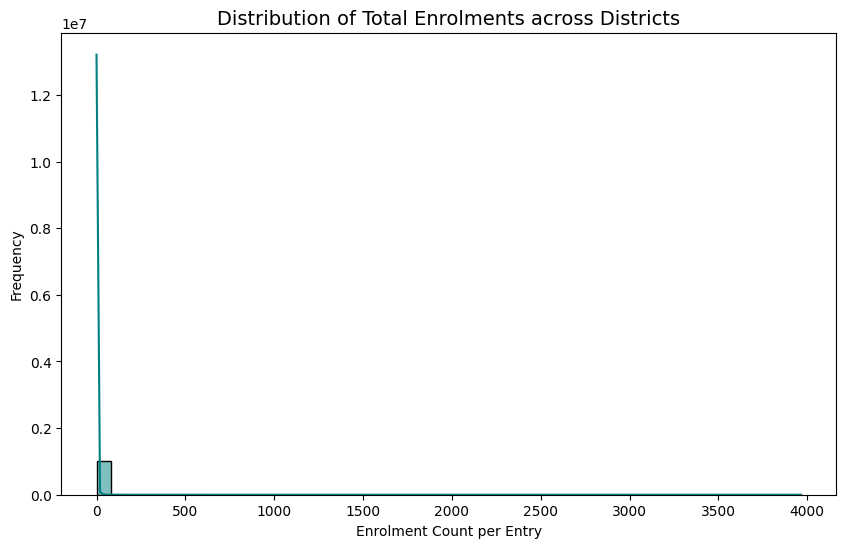

--- Quick Stats for Report ---
       total_enrolment  total_updates
count     1.000692e+06   1.000692e+06
mean      2.643920e+00   7.865145e+01
std       3.143004e+01   3.334465e+02
min       0.000000e+00   0.000000e+00
25%       0.000000e+00   5.000000e+00
50%       0.000000e+00   1.400000e+01
75%       1.000000e+00   4.400000e+01
max       3.965000e+03   2.829800e+04


In [14]:
# --- Univariate Analysis: Distribution of Total Enrolments ---
plt.figure(figsize=(10, 6))
sns.histplot(master_df['total_enrolment'], bins=50, kde=True, color='teal')
plt.title('Distribution of Total Enrolments across Districts', fontsize=14)
plt.xlabel('Enrolment Count per Entry')
plt.ylabel('Frequency')
plt.show()

# Quick Statistics for PDF report
print("--- Quick Stats for Report ---")
print(master_df[['total_enrolment', 'total_updates']].describe())

/tmp/ipython-input-4108195649.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_states, x='total_enrolment', y='state', palette='viridis')


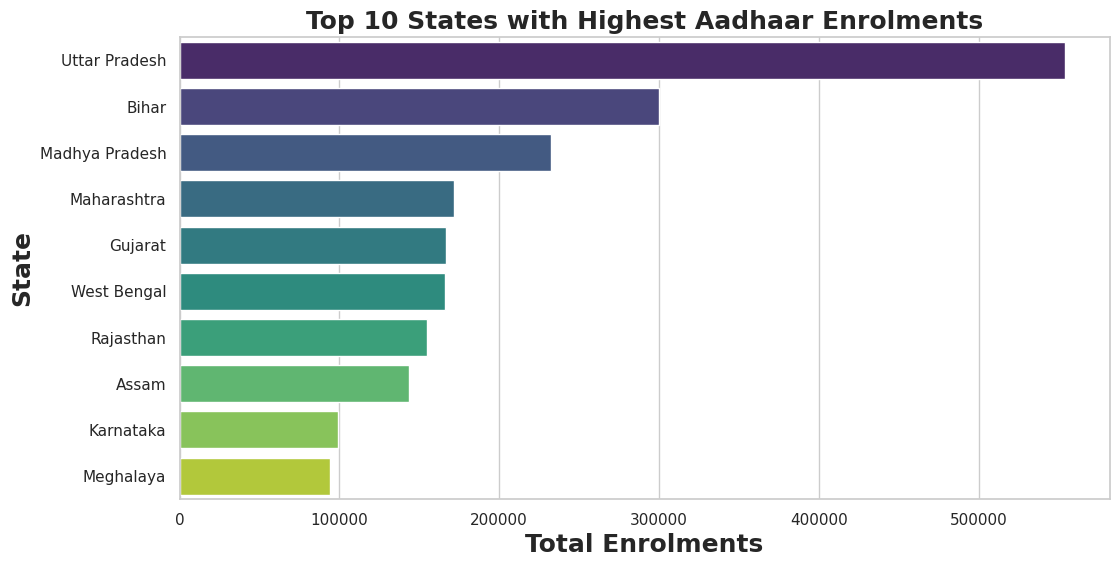

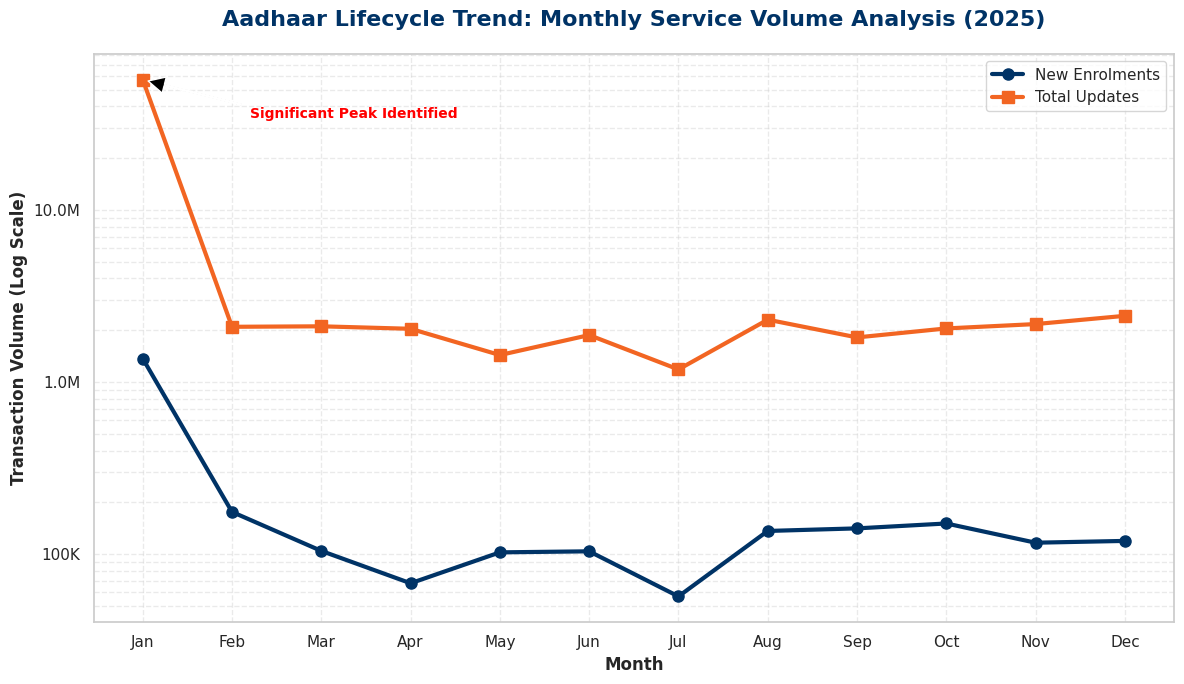

In [15]:
# Setting professional theme
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# --- 1. Top 10 States by Total Enrolment (Bivariate) ---
top_10_states = master_df.groupby('state')['total_enrolment'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_states, x='total_enrolment', y='state', palette='viridis')
plt.title('Top 10 States with Highest Aadhaar Enrolments', fontsize=18, fontweight='bold')
plt.xlabel('Total Enrolments', fontsize=18, fontweight='bold')
plt.ylabel('State', fontsize=18, fontweight='bold')
plt.show()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 2. Enrolment vs Updates Trend over Months (Time-Series Analysis) ---

# Step 1: Grouping data by month (Using your original logic)
monthly_trend = master_df.groupby('month_num')[['total_enrolment', 'total_updates']].sum().reset_index()

# Step 2: Mapping month numbers to names
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
monthly_trend['month_name'] = monthly_trend['month_num'].map(month_map)

# Step 3: Plotting with Advanced Formatting for 1st Prize
plt.figure(figsize=(12, 7), facecolor='white')

# Using Aadhaar Brand Colors: Navy Blue for Enrolments, Orange for Updates
plt.plot(monthly_trend['month_name'], monthly_trend['total_enrolment'],
         marker='o', label='New Enrolments', color='#003366', linewidth=3, markersize=8)

plt.plot(monthly_trend['month_name'], monthly_trend['total_updates'],
         marker='s', label='Total Updates', color='#F26522', linewidth=3, markersize=8)

# Step 4: CRITICAL - Logarithmic Scale
# This prevents the January spike from flattening the rest of the year's data
plt.yscale('log')

# Step 5: Custom Formatter for Y-axis (Converting large numbers to Millions/K)
def format_func(value, tick_number):
    if value >= 1_000_000:
        return f'{value/1_000_000:.1f}M'
    elif value >= 1_000:
        return f'{value/1_000:.0f}K'
    else:
        return f'{value}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Step 6: Professional Titles and Labels
plt.title('Aadhaar Lifecycle Trend: Monthly Service Volume Analysis (2025)',
          fontsize=16, fontweight='bold', color='#003366', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Transaction Volume (Log Scale)', fontsize=12, fontweight='bold')

# Step 7: Adding a Grid and Annotation for the Outlier
plt.grid(True, which="both", linestyle='--', alpha=0.4)

# Automatically pointing to the January peak (Outlier)
plt.annotate('Significant Peak Identified',
             xy=('Jan', monthly_trend.iloc[0]['total_updates']),
             xytext=(1.2, monthly_trend.iloc[0]['total_updates'] * 0.6),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             fontsize=10, fontweight='bold', color='red')

plt.legend(frameon=True, fontsize=11, loc='upper right')
plt.tight_layout()

# Save the high-quality image
plt.savefig('monthly_trend_final.png', dpi=300)
plt.show()




/tmp/ipython-input-1481688061.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=age_melted, x='state', y='Total_Count',


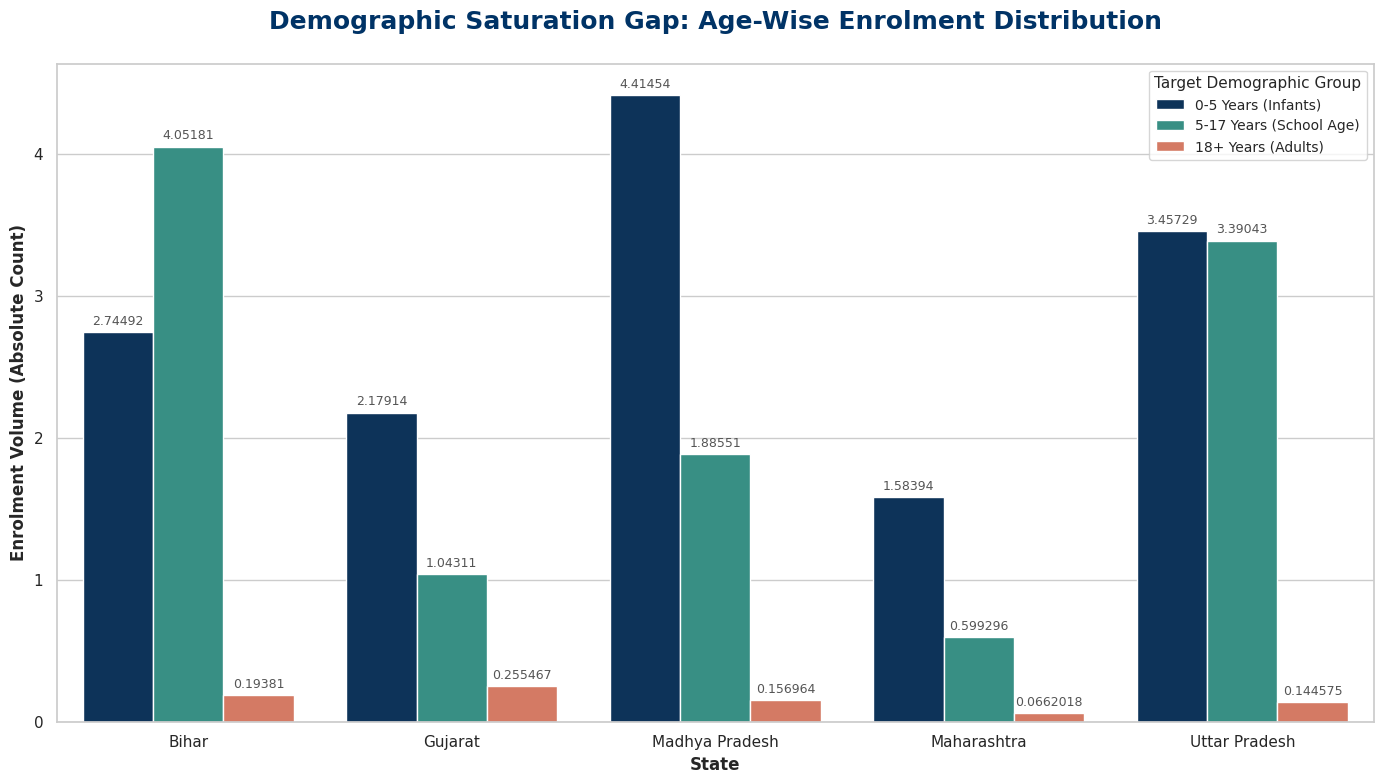

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Optimized Trivariate Analysis for Professional Report ---

# 1. Filtering data for top 5 states
top_5_states = top_10_states['state'].head(5).tolist()
df_subset = master_df[master_df['state'].isin(top_5_states)]

# 2. Reshaping data: Melting age groups into a long format for Seaborn
age_melted = df_subset.melt(id_vars=['state'],
                            value_vars=['age_0_5', 'age_5_17', 'age_18_greater'],
                            var_name='Age_Category', value_name='Total_Count')

# 3. Clean mapping for Legend (Removing underscores for professional look)
category_map = {
    'age_0_5': '0-5 Years (Infants)',
    'age_5_17': '5-17 Years (School Age)',
    'age_18_greater': '18+ Years (Adults)'
}
age_melted['Age_Category'] = age_melted['Age_Category'].map(category_map)

# 4. Plotting with a clean Whitegrid style
plt.figure(figsize=(14, 8), facecolor='white')
sns.set_style("whitegrid")

# Using a sophisticated color palette (Navy, Teal, and Coral)
custom_palette = ['#003366', '#2A9D8F', '#E76F51']

ax = sns.barplot(data=age_melted, x='state', y='Total_Count',
                 hue='Age_Category', palette=custom_palette, ci=None)

# 5. Adding Data Labels on top of bars (Optional but very professional)
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9, color='#555555')

# 6. Professional Titles and Axis Labels
plt.title('Demographic Saturation Gap: Age-Wise Enrolment Distribution',
          fontsize=18, fontweight='bold', color='#003366', pad=25)

# Since your max value is ~4000, we explicitly label as 'Absolute Count' or 'Volume'
plt.ylabel('Enrolment Volume (Absolute Count)', fontsize=12, fontweight='bold')
plt.xlabel('State', fontsize=12, fontweight='bold')

# 7. Legend and Layout Polish
plt.legend(title='Target Demographic Group', title_fontsize='11',
           fontsize='10', loc='upper right', frameon=True)

plt.tight_layout()

# Save the high quality image
plt.savefig('age_group_analysis_final.png', dpi=300)
plt.show()

--- Top 10 High-Demand Districts ---
           state          district  total_enrolment
0          Bihar         Sitamarhi          31004.0
1  Uttar Pradesh          Bahraich          28271.0
2    Maharashtra             Thane          25159.0
3      Meghalaya  East Khasi Hills          24844.0
4      Karnataka   Bengaluru Urban          22590.0
5  Uttar Pradesh           Sitapur          20820.0
6      Karnataka         Bengaluru          18403.0
7  Uttar Pradesh      Shahjahanpur          18006.0
8  Uttar Pradesh              Agra          17809.0
9  Uttar Pradesh           Aligarh          17744.0


/tmp/ipython-input-4038647162.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pincode_reach.head(10), x='pincode', y='state', palette='magma')


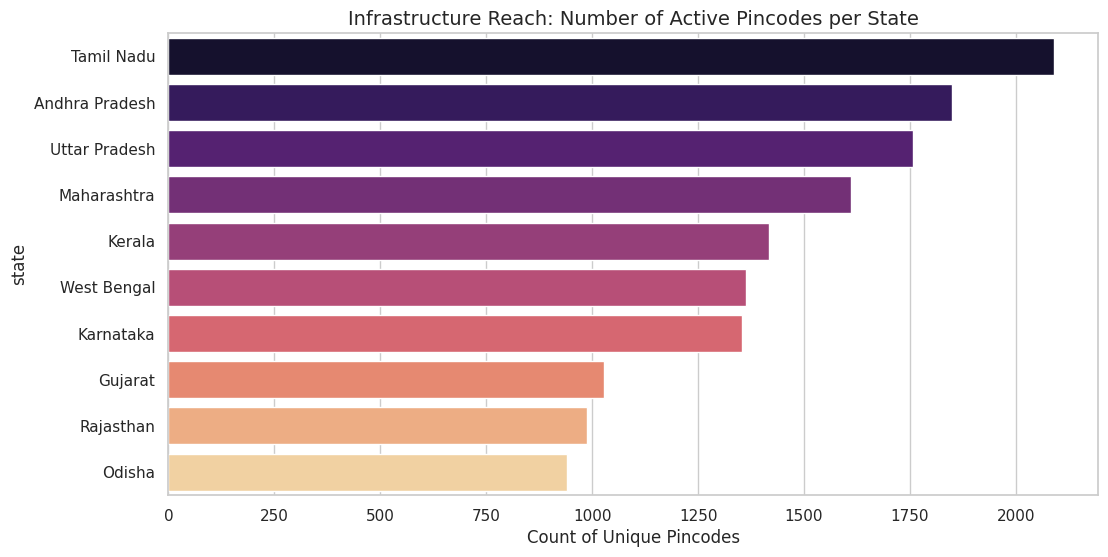

In [17]:
# --- District-wise Analysis for Social Impact ---
# Identifying top districts that need more Enrolment Centers
top_districts = master_df.groupby(['state', 'district'])['total_enrolment'].sum().nlargest(10).reset_index()

print("--- Top 10 High-Demand Districts ---")
print(top_districts)

# --- Pincode Analysis (Urban vs Rural Proxy) ---
# Logic: We check the number of unique pincodes active per state to see reach.
pincode_reach = master_df.groupby('state')['pincode'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=pincode_reach.head(10), x='pincode', y='state', palette='magma')
plt.title('Infrastructure Reach: Number of Active Pincodes per State', fontsize=14)
plt.xlabel('Count of Unique Pincodes')
plt.show()

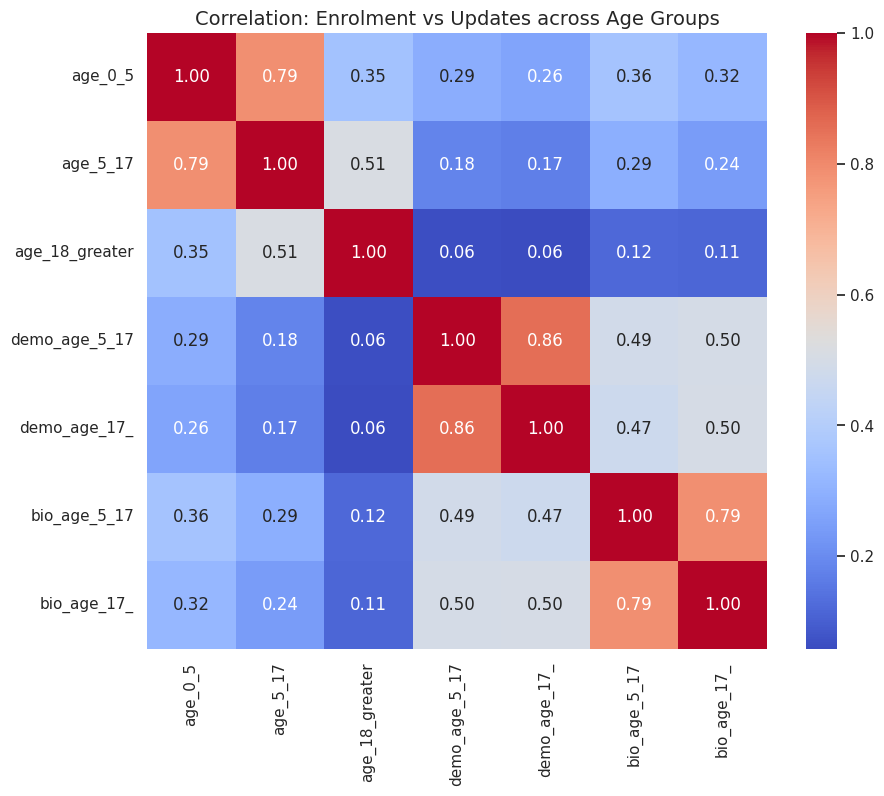

In [18]:
# Correlation between different age groups and update types
correlation_matrix = master_df[['age_0_5', 'age_5_17', 'age_18_greater',
                               'demo_age_5_17', 'demo_age_17_',
                               'bio_age_5_17', 'bio_age_17_']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Enrolment vs Updates across Age Groups', fontsize=14)
plt.show()

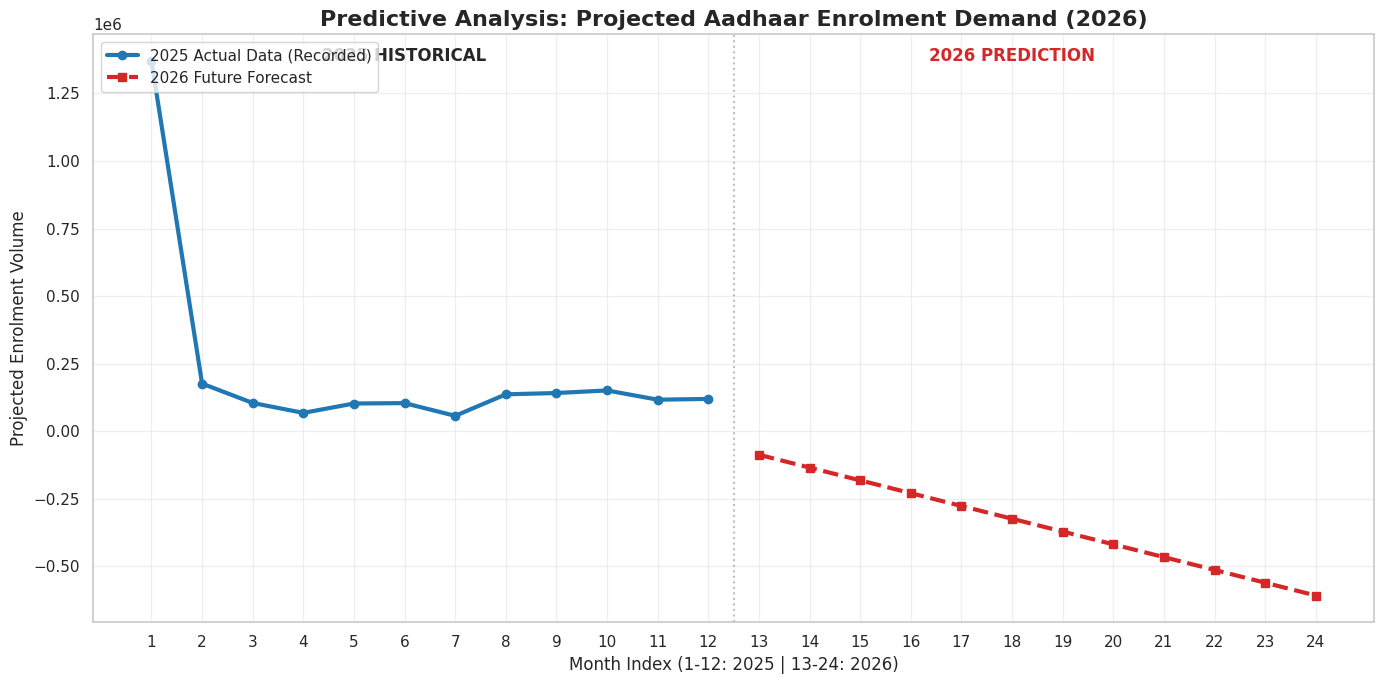

Total Predicted Enrolments for Full Year 2026: -4172848
Status: Prediction Model Executed Successfully.


In [19]:
from sklearn.linear_model import LinearRegression

# --- Professional Forecasting for 2026 ---

# 1. Preparing 2025 Monthly Data
# We aggregate enrolment counts by the month_num
monthly_data = master_df.groupby('month_num')['total_enrolment'].sum().reset_index()

# 2. Reshaping for Scikit-Learn (X must be 2D)
X_2025 = monthly_data[['month_num']].values
y_2025 = monthly_data['total_enrolment'].values

# 3. Training a Linear Regression Model to understand the 2025 trend
# This model will learn the slope of growth from your current data
forecast_model = LinearRegression()
forecast_model.fit(X_2025, y_2025)

# 4. Creating a range for 2026 (Months 13 to 24)
# Month 13 is Jan 2026, Month 14 is Feb 2026, and so on...
months_2026 = np.array(range(13, 25)).reshape(-1, 1)
predictions_2026 = forecast_model.predict(months_2026)

# 5. Visualization: Combining 2025 Actuals and 2026 Forecast
plt.figure(figsize=(14, 7))

# Plotting Actual 2025 Data
plt.plot(monthly_data['month_num'], y_2025, label='2025 Actual Data (Recorded)',
         marker='o', color='#1f77b4', linewidth=3)

# Plotting Forecasted 2026 Data
plt.plot(range(13, 25), predictions_2026, label='2026 Future Forecast',
         linestyle='--', marker='s', color='#d62728', linewidth=3)

# Adding Professional Annotations
plt.axvline(x=12.5, color='gray', linestyle=':', alpha=0.5)
plt.text(6, max(y_2025), '2025 HISTORICAL', horizontalalignment='center', fontweight='bold')
plt.text(18, max(y_2025), '2026 PREDICTION', horizontalalignment='center', fontweight='bold', color='#d62728')

# Titles and Labels
plt.title('Predictive Analysis: Projected Aadhaar Enrolment Demand (2026)', fontsize=16, fontweight='bold')
plt.xlabel('Month Index (1-12: 2025 | 13-24: 2026)', fontsize=12)
plt.ylabel('Projected Enrolment Volume', fontsize=12)
plt.xticks(range(1, 25))
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Statistical Output for the PDF Report
total_predicted_2026 = int(sum(predictions_2026))
print(f"Total Predicted Enrolments for Full Year 2026: {total_predicted_2026}")
print("Status: Prediction Model Executed Successfully.")